# pandasによる可視化

* `pandas.Series.plot` メソッドまたは `pandas.DataFrame.plot` メソッドからデータを可視化できる
* 簡素な記法で記述できる
* 実際にはMatplotlibで描画している（pandasでMatplotlibをラップしている）

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

乱数でデータを作成

In [2]:
np.random.seed(0)
df = pd.DataFrame(np.random.randn(100, 4), columns=list("ABCD"))

In [3]:
df.head()

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096


## 基本的なグラフ

### 線グラフ

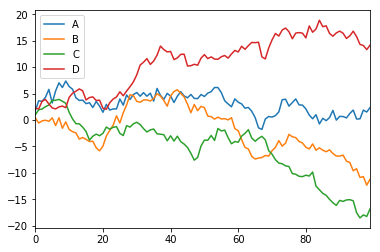

In [4]:
df.cumsum().plot()

### 散布図

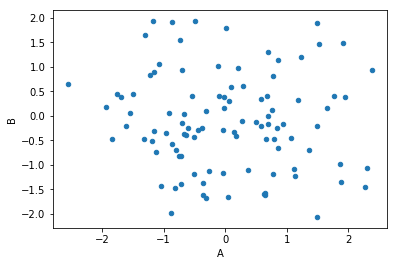

In [5]:
df.plot.scatter(x="A", y="B")

### 棒グラフ

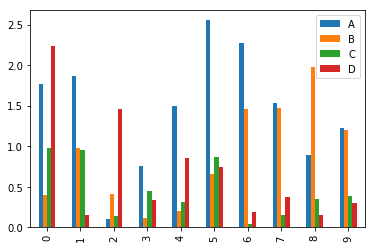

In [6]:
df.iloc[:10].applymap(abs).plot.bar()

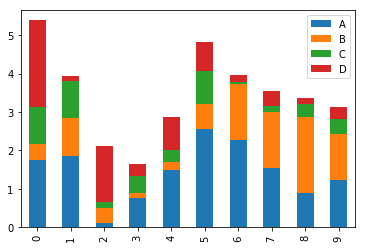

In [7]:
df.iloc[:10].applymap(abs).plot.bar(stacked=True)

### ヒストグラム

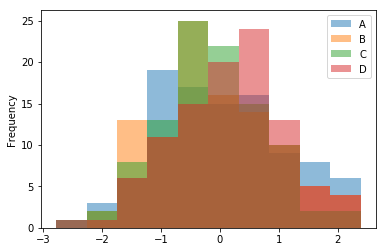

In [8]:
df.plot.hist(alpha=0.5)

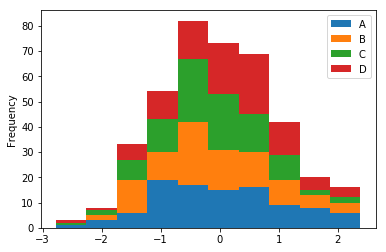

In [9]:
df.plot.hist(stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdd65f3390>,
      dtype=object)

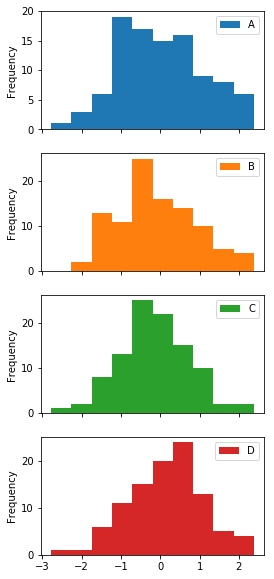

In [10]:
df.plot.hist(subplots=True, figsize=(4, 10))

## 複数のグラフ

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdd6443e48>,
      dtype=object)

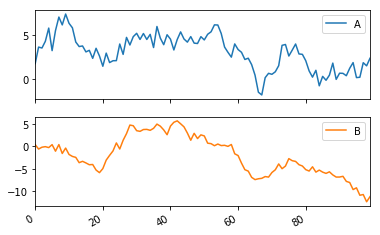

In [11]:
df[["A", "B"]].cumsum().plot(subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdd63227b8>,
      dtype=object)

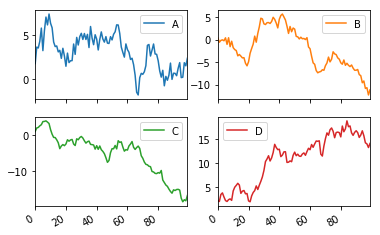

In [12]:
df.cumsum().plot(subplots=True, layout=(2, 2))

Axesオブジェクトを上書きする

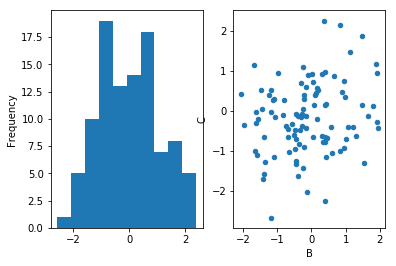

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
df["A"].plot.hist(ax=ax1)
df.plot.scatter(x="B", y="C", ax=ax2)

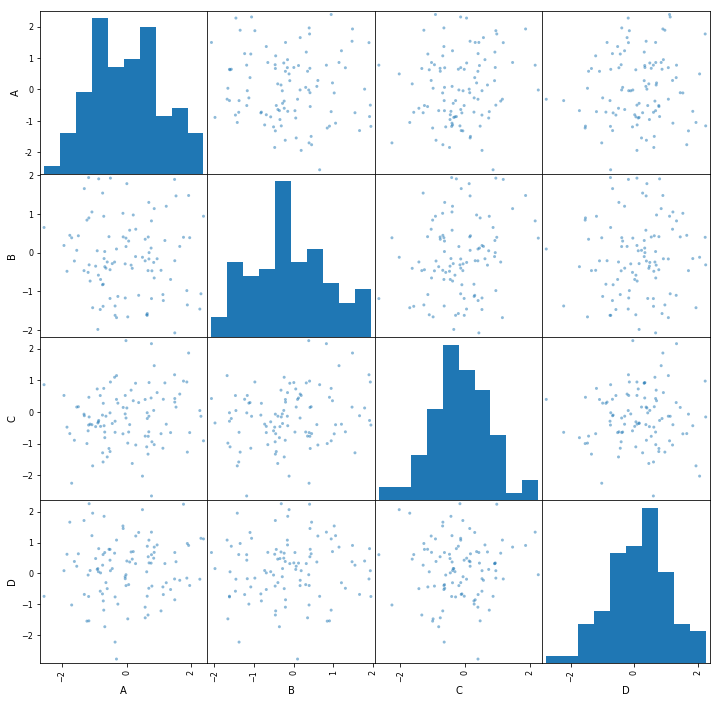

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12, 12));

## 書式の指定

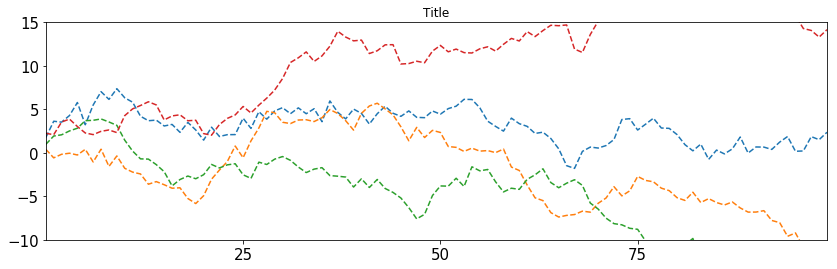

In [15]:
df.cumsum().plot(
    figsize=(14, 4),  # グラフのサイズ
    title="Title",  # タイトル
    legend=False,  # 凡例を非表示
    style="--",  # グラフ要素の書式
    xticks=[25, 50, 75],  # X軸の目盛指定
    ylim=[-10, 15],  # Y軸の範囲指定
    fontsize=15,  # 軸ラベルのフォントサイズ
)